**Nom:** Luis Vera Albarca  
**NIU:** 1637397  

# **<span style="color:turquoise">CAS KAGGLE: VIDEOGAMES SALES WITH RATINGS</span>**

### **<span style="color:#EE82EE;">INTRODUCCIÓ A LA BASE DE DADES</span>**

<div style="text-align: justify;">
La base de dades "Video Game Sales with Ratings" de Kaggle recull informació detallada sobre les vendes de videojocs a nivell mundial, proporcionant dades sobre els videojocs més venuts i les seves valoracions. Aquesta base de dades permet explorar diverses variables relacionades amb la indústria dels videojocs i és una eina valuosa per a realitzar anàlisis de dades i visualitzacions. Algunes de les columnes més importants inclouen:

* <span style="color:#98FF98;">**Nom del joc:**</span> El títol del videojoc.
* <span style="color:#98FF98;">**Plataforma:**</span> La consola o dispositiu en què es va llançar el joc (per exemple, PlayStation, Xbox, Nintendo, PC, etc.).
* <span style="color:#98FF98;">**Plataforma:**</span> La consola o dispositiu en què es va llançar el joc (per exemple, PlayStation, Xbox, Nintendo, PC, etc.).
* <span style="color:#98FF98;">**Any de llançament:**</span> L'any en què el videojoc es va publicar per primera vegada.
* <span style="color:#98FF98;">**Gènere:**</span> El tipus de joc (acció, aventura, esports, etc.).
* <span style="color:#98FF98;">**Editorial:**</span> L'empresa responsable de la publicació del joc.
* <span style="color:#98FF98;">**Vendes globals:**</span> El nombre de còpies venudes arreu del món, expressat en milions.
* <span style="color:#98FF98;">**Valoracions:**</span> Les puntuacions assignades pel públic o per les crítiques especialitzades, com per exemple la valoració de Metacritic.

A més, la base de dades ofereix dades segmentades per regions específiques com Nortamèrica, Europa i Japó, permetent fer anàlisis regionals per comprendre les diferències en les preferències de videojocs a nivell global.
</div>





### **<span style="color:#EE82EE">IMPORTAR DATASET</span>**

In [69]:
#Carreguem el dataset a traves de kaggle
#En primer lloc importem la api

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

import os

In [70]:
#Seguidament, descarreguem el dataset


from zipfile import ZipFile
import time
dataser_owner = 'rush4ratio'
dataset_name= 'video-game-sales-with-ratings'
dataset = f'{dataser_owner}/{dataset_name}'

if not os.path.isdir('data'):
  os.mkdir('data')
api.dataset_download_files(dataset = dataset,path = 'data')
zf = ZipFile(f'data/{dataset_name}.zip')
zf.extractall(f'data/{dataset_name}') 
zf.close()

Dataset URL: https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings


### **<span style="color:#EE82EE">IMPORTS</span>**

In [71]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


### **<span style="color:#EE82EE">LECTURA DEL DATASET</span>**

In [72]:
#Llegim el dataset i fem un print per fer-li una primera ullada

df = pd.read_csv(f'data/video-game-sales-with-ratings/Video_Games_Sales_as_at_22_Dec_2016.csv')

df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


### **<span style="color:#EE82EE">ANÀLISI DEL DATASET</span>**

En aquest apartat analitzarem els atributs del dataset i com es relacionen entre ells. 

In [73]:
#Quantitat d'atributs i llistat

def mostrar_atributs(df):

    print("Quantitat d'atributs: ",len(df.columns))
    print()

    print("Quantitat de mostres: ",len(df))
    print()

    info_dict = {
        col: {
            "Tipus de Dada": df[col].dtype,
            "Valors No Nuls": df[col].notnull().sum(),
            "Valors NaNs": df[col].isnull().sum(),
            "Percentatge NaNs (%)": (df[col].isnull().sum() / len(df) * 100)
        }
        for col in df.columns
    }
    
    # Mostrar el diccionari amb els resultats
    print("Anàlisi dels atributs del Dataset:")
    for atributo, info in info_dict.items():
        print(f"\nAtribut: {atributo}")
        for clave, valor in info.items():
            print(f"  {clave}: {valor}")
    
    # Retornar el diccionari amb la informació
    return info_dict

info_atributs = mostrar_atributs(df)



Quantitat d'atributs:  16

Quantitat de mostres:  16719

Anàlisi dels atributs del Dataset:

Atribut: Name
  Tipus de Dada: object
  Valors No Nuls: 16717
  Valors NaNs: 2
  Percentatge NaNs (%): 0.011962437944853162

Atribut: Platform
  Tipus de Dada: object
  Valors No Nuls: 16719
  Valors NaNs: 0
  Percentatge NaNs (%): 0.0

Atribut: Year_of_Release
  Tipus de Dada: float64
  Valors No Nuls: 16450
  Valors NaNs: 269
  Percentatge NaNs (%): 1.60894790358275

Atribut: Genre
  Tipus de Dada: object
  Valors No Nuls: 16717
  Valors NaNs: 2
  Percentatge NaNs (%): 0.011962437944853162

Atribut: Publisher
  Tipus de Dada: object
  Valors No Nuls: 16665
  Valors NaNs: 54
  Percentatge NaNs (%): 0.32298582451103536

Atribut: NA_Sales
  Tipus de Dada: float64
  Valors No Nuls: 16719
  Valors NaNs: 0
  Percentatge NaNs (%): 0.0

Atribut: EU_Sales
  Tipus de Dada: float64
  Valors No Nuls: 16719
  Valors NaNs: 0
  Percentatge NaNs (%): 0.0

Atribut: JP_Sales
  Tipus de Dada: float64
  Valors N

<div style="text-align: justify;">
Com podem veure a la part superior, <span style="color: #98FF98; font-weight: bold;">el nostre dataset conté</span> un total de <span style="color: #98FF98; font-weight: bold;">16 atributs</span> i <span style="color: turqu#98FF98oise; font-weight: bold;">16.719 mostres</span> analitzades, també podem fer una primera ullada al tipus de dada és cada atribut i als NaNs que contenen, però això últim ho analitazrem més en detall a continuació.
Un cop hem vist un per un els atributs i les seves característiques de manera general, anem a fer un anàlisi de característiques concretes d'una manera més gràfica. Començarem analitzant la quantitat de valors NaNs que té cada un dels atributs del dataset.
</div>


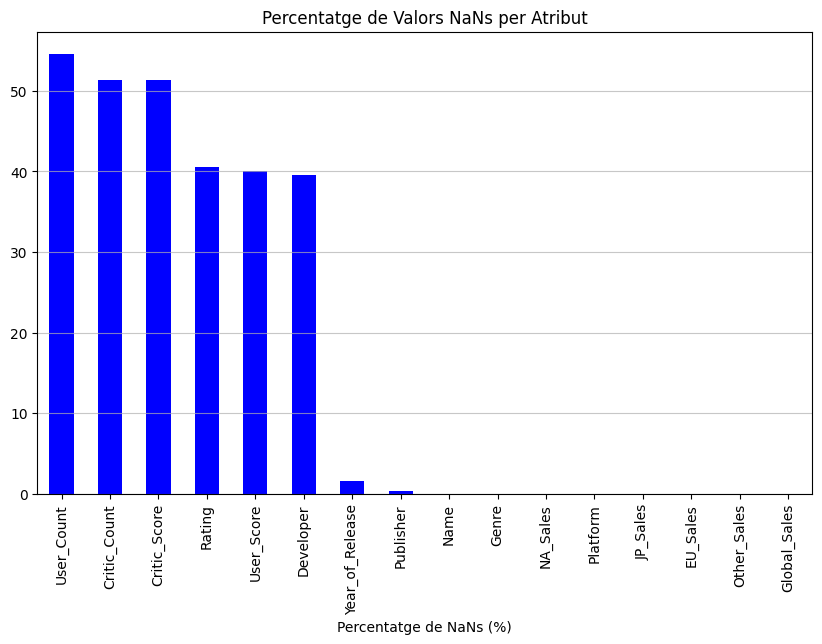

In [74]:
#Anàlisi de NaNs al dataset
def plot_nan_percentage(df):

    # Calcular el percentatge de valors NaN per cada atribut
    nan_percentage = (df.isnull().sum() / len(df)) * 100
    
    # Crear la gràfica
    plt.figure(figsize=(10, 6))
    nan_percentage.sort_values(ascending=False).plot(kind='bar', color='blue')
    plt.xlabel("Percentatge de NaNs (%)")
    plt.title("Percentatge de Valors NaNs per Atribut")
    plt.grid(axis='y', linestyle='-', alpha=0.7)
    plt.show()

plot_nan_percentage(df)

<div style="text-align: justify;">
Com es pot veure a la gràfica, tenim un total de 8 atributs que contenen NaNs: 
<span style="color: #98FF98; font-weight: bold;">User_Count</span>, 
<span style="color: #98FF98; font-weight: bold;">Critic_Count</span>, 
<span style="color: #98FF98; font-weight: bold;">Critic_Score</span>, 
<span style="color: #98FF98; font-weight: bold;">Rating</span>, 
<span style="color: #98FF98; font-weight: bold;">User_Score</span>, 
<span style="color: #98FF98; font-weight: bold;">Developer</span>, 
<span style="color: #98FF98; font-weight: bold;">Year_of_Release</span> i 
<span style="color: #98FF98; font-weight: bold;">Publisher</span>.

A més, hi ha 2 atributs més que tenen NaNs, però en una proporció tant petita que no s'aprecia a la gràfica: 
<span style="color: #98FF98; font-weight: bold;">Name</span> i <span style="color: #98FF98; font-weight: bold;">Genre</span>. Aquests atributs tant sols tenen 2 mostres de les 16.719 mostres totals amb valors NaNs, el que representa un <span style="color: orange; font-weight: bold;">0.012%</span> de les mostres.

Tornant a la gràfica, podem observar com els atributs 
<span style="color: #98FF98; font-weight: bold;">Year_of_Release</span> i 
<span style="color: #98FF98; font-weight: bold;">Publisher</span> tenen un percentatge de NaNs inferior al <span style="color: orange; font-weight: bold;">2%</span>, els atributs 
<span style="color: #98FF98; font-weight: bold;">Rating</span>, 
<span style="color: #98FF98; font-weight: bold;">User_Score</span> i 
<span style="color: #98FF98; font-weight: bold;">Developer</span> ronden el <span style="color: red; font-weight: bold;">40%</span> de NaNs i, finalment, els atributs 
<span style="color: #98FF98; font-weight: bold;">User_Count</span>, 
<span style="color: #98FF98; font-weight: bold;">Critic_Count</span> i 
<span style="color: #98FF98; font-weight: bold;">Critic_Score</span> ronden el <span style="color: red; font-weight: bold;">50%</span> de valors NaNs. Més endavant veurem com tractem aquests NaNs, però abans continuarem analitzant altres característiques dels atributs.
</div>

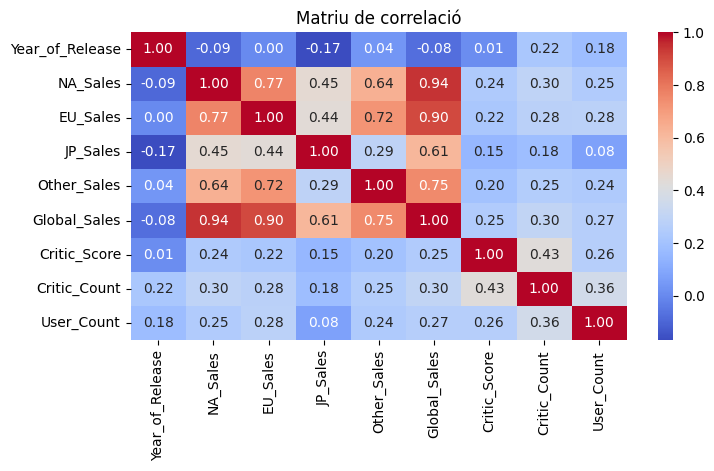

In [75]:

#Per tal de poder fer un primer anàlisi de correlacions, seleccionem les columnes numèriques 

columnes_numeriques = df.select_dtypes(include=['float64', 'int64']).columns
df_nums = df[columnes_numeriques]

#I fem una matriu de correlació

plt.figure(figsize=(8, 4))
sns.heatmap(df_nums.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriu de correlació")
plt.show()


<div style="text-align: justify;">
En aquest primer anàlisi de correlacions, podem observar, per exemple, com el número de vendes d'un videojoc a Europa i a Amèrica del Nord té un gran pes en el número de vendes del videojoc a nivell global, a diferència de Japó, que tot i que les vendes del joc al seu territori tenen correlació amb les vendes a nivell global, aquesta força correlació es força més baixa a la dels dos territoris esmentats anteriorment, això ens fa pensar que existeix una diferència de gustos sobre videojocs a Japó respecte a Occident.

També, podem veure com les puntuacions que reben els videojocs per part de la crítica i del públic no tenen perquè significar que un viedojoc vengui més o menys, ja que la correlació entre les puntuacions i les vendes globals no supera el 30%. A més, seguint parlant sobre les puntuacions, podem veure com les valoracions que fa la crítica d'un videojoc no tenen perquè anar de la mà amb la opinió que els usuaris comuns tenen sobre ell, ja que la correlació es inferior al 50%.

Un cop fet aquest anàlisi de correlacions preliminar, toca fer l'anàlisi complet de la base de dades, incloent també les variables categòriques. M'ha cridat l'atenció aquesta diferència de vendes significativa d'un videojoc entre Occident i territori japonès, així que enfocaré l'anàlisi en trobar les raons que comporten aquesta diferència.
</div>

### **<span style="color:#EE82EE">PREPROCESSING</span>**
<div style="text-align: justify;">
En aquest apartat preparem la base de dades per tal de veure com afecten certs atributs a les vendes de videojocs a diferents territoris.

Començarem eliminant columnes que no ens seran necessàries per a la realització del nostre estudi del dataset: eliminarem la columna 'Name', que com cada joc en té un de diferent no ens serà útil. A més la columna anys de llançament no ens serà necessària. Pel que fa a 'Publisher' la eliminem perquè conté moltes opcions diferents, més de 300, i 'Developer' la eliminem pel gran número de Nans que conté. Farem el mateix amb 'Rating', 'Critic_Count', 'Critic_Score', 'User_Count' i 'User_Score'.
</div>

In [76]:
#Atributs irrellavants

#Funció per eliminar atributs irrellevants

def eliminar_atributs(df, columnes_a_eliminar): 

    df_sense_atributs = df.drop(columns=columnes_a_eliminar, axis=1)
    return df_sense_atributs


atributs_a_eliminar = ['Name', 'Year_of_Release', 'Rating','Critic_Count','Critic_Score','User_Count','User_Score','Publisher','Developer']

df_sense_atributs = eliminar_atributs(df, atributs_a_eliminar)

#df_sense_atributs

# Llistar plataformes úniques
unique_platforms = df['Platform'].unique()
#print("Llista de plataformes úniques:", unique_platforms)


#Codificació de les plataformes en funció de la companyia a la que pertanyen
def classify_platform(platform):
    # Diccionari de plataformes per companyia
    platform_dict = {
        'Nintendo': ['Wii', 'NES', 'GB', 'DS', 'GBA', '3DS', 'N64', 'WiiU', 'GC' ],
        'Sony': ['PS3', 'PS2', 'PS4', 'PS', 'PSP', 'PSV'],
        'Microsoft': ['X360', 'XB', 'XOne'],
        'Atari': ['2600'],
        'Sega': ['GEN','SAT', 'DC', 'SCD', 'GG'],
        'PC': ['PC'],
        'Altres':['WS', 'PCFX', '3DO', 'TG16']
    }
    # Comprovar a quina companyia pertany la plataforma
    for company, platforms in platform_dict.items():
        if platform in platforms:
            return company
    return 'Altres'  # Si no es troba cap coincidència

# Aplicar la funció per classificar les plataformes
df_sense_atributs['Company'] = df_sense_atributs['Platform'].apply(classify_platform)

#df_sense_atributs


#Label Encoding a company i genre

# Crear instància de LabelEncoder
labels = LabelEncoder()

# Aplicar Label Encoding a les columnes "Company" i "Genre"
df_sense_atributs['Company_code'] = labels.fit_transform(df_sense_atributs['Company'])
df_sense_atributs['Genre_code'] = labels.fit_transform(df_sense_atributs['Genre'])

# Mostrar el DataFrame amb les noves columnes codificades
#print(df_sense_atributs)

# Definir un llindar per a les vendes "bones"
llindarNA = df_sense_atributs['NA_Sales'].mean()
llindarEU = df_sense_atributs['EU_Sales'].mean()
llindarJP = df_sense_atributs['JP_Sales'].mean()
llindarOthers = df_sense_atributs['Other_Sales'].mean()
llindarGlobal = df_sense_atributs['Global_Sales'].mean()

# Codificar les vendes com binàries (1 = bones vendes, 0 = males vendes)
for index, row in df_sense_atributs.iterrows():
    # Codificar Japó
    if row['JP_Sales'] >= llindarJP:
        df_sense_atributs.at[index, 'Japan_Ventes_Binaria'] = 1
    else:
        df_sense_atributs.at[index, 'Japan_Ventes_Binaria'] = 0
    
    # Codificar AmÈrica del Nord
    if row['NA_Sales'] >= llindarNA:
        df_sense_atributs.at[index, 'NA_Ventes_Binaria'] = 1
    else:
        df_sense_atributs.at[index, 'NA_Ventes_Binaria'] = 0
    
    # Codificar Europa
    if row['EU_Sales'] >= llindarEU:
        df_sense_atributs.at[index, 'EU_Ventes_Binaria'] = 1
    else:
        df_sense_atributs.at[index, 'EU_Ventes_Binaria'] = 0
    
    #Global
    if row['Global_Sales'] >= llindarGlobal:
        df_sense_atributs.at[index, 'Global_Ventes_Binaria'] = 1
    else:
        df_sense_atributs.at[index, 'Global_Ventes_Binaria'] = 0
    
    # Codificar Altres territoris
    if row['Other_Sales'] >= llindarOthers:
        df_sense_atributs.at[index, 'Other_Ventes_Binaria'] = 1
    else:
        df_sense_atributs.at[index, 'Other_Ventes_Binaria'] = 0


print(df_sense_atributs)


      Platform         Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0          Wii        Sports     41.36     28.96      3.77         8.45   
1          NES      Platform     29.08      3.58      6.81         0.77   
2          Wii        Racing     15.68     12.76      3.79         3.29   
3          Wii        Sports     15.61     10.93      3.28         2.95   
4           GB  Role-Playing     11.27      8.89     10.22         1.00   
...        ...           ...       ...       ...       ...          ...   
16714      PS3        Action      0.00      0.00      0.01         0.00   
16715     X360        Sports      0.00      0.01      0.00         0.00   
16716      PSV     Adventure      0.00      0.00      0.01         0.00   
16717      GBA      Platform      0.01      0.00      0.00         0.00   
16718      PSV    Simulation      0.00      0.00      0.01         0.00   

       Global_Sales    Company  Company_code  Genre_code  \
0             82.53   Nintendo         